<a href="https://colab.research.google.com/github/maitreya-v/Audio-Classification-Librosa/blob/main/Music_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
import numpy as np
import pandas as pd 
import librosa 
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filepath='/content/drive/MyDrive/Data/genres_original/blues/blues.00000.wav'
data,sr=librosa.load(filepath)

In [ ]:
data,sr

(array([ 0.00732422,  0.01660156,  0.00762939, ..., -0.05560303,
        -0.06106567, -0.06417847], dtype=float32),
 22050)

In [ ]:
ipd.Audio(filepath)

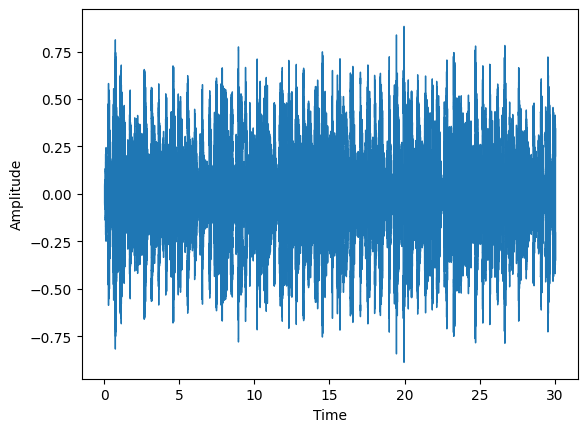

In [ ]:
librosa.display.waveshow(data)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
folderpath='/content/drive/MyDrive/Data/genres_original'
data,sr=librosa.load('/content/drive/MyDrive/Data/genres_original/blues/blues.00000.wav')
# mfcc=np.mean(librosa.feature.mfcc(y=data,sr=sr,n_mfcc=40))
mfcc=np.mean(librosa.feature.mfcc(y=data,sr=sr,n_mfcc=40).T,axis=0)
mfcc.shape

(40,)

In [ ]:

import os
import math
folderpath='/content/drive/MyDrive/Data/genres_original'

SAMPLE_RATE=22050
DURATION=30
SAMPLE_RATE_PER_AUDIO=SAMPLE_RATE*DURATION
NUM_OF_SEGMENTS = 5
SAMPLE_RATE_PER_SEGMENT = SAMPLE_RATE_PER_AUDIO/NUM_OF_SEGMENTS
n_mfcc = 13
hop_length = 512
n_fft = 2048
num_mfcc_vectors_per_segment = math.ceil(SAMPLE_RATE_PER_SEGMENT / hop_length)

labels=[]

df_mfccs=[]
df_labels=[]

for index,(dirpath,foldername,filepath) in enumerate(os.walk(folderpath)):
  if index==0:
    labels=foldername
  else:
    for file in tqdm(filepath, desc=f"Processing genre {labels[index-1]}"):
      # mfcc_data=[]
      # label_data=[]
      path = folderpath + '/' + str(file.split('.')[0])  + '/' + str(file)
      # print(file.split('.')[0])
      # try:
      #   data,sr = librosa.load(path,sr=SAMPLE_RATE)
      #   mfcc = np.mean(librosa.feature.mfcc(y=data,sr=sr,n_mfcc=40).T,axis=0)

      # except:
      #   print('')  
      try:
        data,sr = librosa.load(path,sr=SAMPLE_RATE)
        for i in range(NUM_OF_SEGMENTS):

          start = int(SAMPLE_RATE_PER_SEGMENT * i)
          end = int(start + SAMPLE_RATE_PER_SEGMENT)
          mfcc = np.mean(librosa.feature.mfcc(y=data[start:end], sr=sr, n_mfcc=40, n_fft=n_fft, hop_length=hop_length).T,axis=0)
          df_mfccs.append(mfcc)
          df_labels.append(index-1)
      except:
        print('')    




Processing genre jazz:  56%|█████▌    | 56/100 [00:05<00:06,  6.66it/s]<ipython-input-101-d758ed409673>:36: UserWarning: PySoundFile failed. Trying audioread instead.
  data,sr = librosa.load(path,sr=SAMPLE_RATE)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
Processing genre jazz:  58%|█████▊    | 58/100 [00:05<00:07,  5.86it/s]

Processing genre blues: 100%|██████████| 100/100 [00:09<00:00, 10.26it/s]


In [ ]:
reshape_mfccs=np.array(df_mfccs).reshape(len(df_mfccs),-1)

In [ ]:
df_labels=np.array(df_labels)
df_labels.shape
unique_values, counts=np.unique(df_labels,return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

0: 500
1: 500
2: 495
3: 500
4: 500
5: 500
6: 500
7: 500
8: 500
9: 500


In [ ]:
df_mfccs=np.array(df_mfccs)

In [ ]:
from keras.utils import to_categorical

df_labels=to_categorical(df_labels)
df_labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
X = df_mfccs

y = df_labels

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
X_train.shape,X_test.shape,X.shape

((3496, 40), (1499, 40), (4995, 40))

In [158]:
X_test[:5]

array([[-5.77953300e+01,  6.73664551e+01,  1.83961582e+00,
         1.19006758e+01,  1.23894167e+00,  3.82760620e+00,
         5.51662874e+00, -7.63873100e-01,  2.39672452e-01,
         5.64053917e+00, -3.52406502e+00,  1.88192531e-01,
        -3.55302405e+00, -2.39048624e+00, -2.42364025e+00,
        -2.71779513e+00, -2.92924833e+00, -1.55508375e+00,
        -3.40531564e+00,  2.28356436e-01, -1.42257190e+00,
        -1.94171476e+00, -2.46749306e+00, -3.08034897e-01,
        -1.17597926e+00, -1.85291731e+00, -1.74834323e+00,
        -3.75726438e+00, -8.67677212e-01,  1.27000734e-01,
        -2.08759952e+00, -3.29105914e-01, -2.65648079e+00,
        -1.86042333e+00, -3.96391690e-01,  2.96581298e-01,
         1.05396914e+00, -1.54084098e+00, -2.49320269e+00,
        -3.21088338e+00],
       [-1.95238449e+02,  1.41616516e+02, -2.49933071e+01,
         5.53122711e+01, -3.41898155e+00,  1.49719095e+00,
        -2.11256638e+01, -1.12763729e+01, -1.29239960e+01,
        -7.85123491e+00,  6.62

In [159]:
y_test[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
import tensorflow as tf
# ,kernel_regularizer=tf.keras.regularizers.L2(0.0001
model = tf.keras.Sequential()



model.add(tf.keras.layers.Dense(units=512,activation='relu',input_shape=(40,),kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=256,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=64,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_112 (Dense)           (None, 512)               20992     
                                                                 
 dropout_82 (Dropout)        (None, 512)               0         
                                                                 
 dense_113 (Dense)           (None, 256)               131328    
                                                                 
 dropout_83 (Dropout)        (None, 256)               0         
                                                                 
 dense_114 (Dense)           (None, 64)                16448     
                                                                 
 dropout_84 (Dropout)        (None, 64)                0         
                                                                 
 dense_115 (Dense)           (None, 10)              

In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=32,epochs=200)

Epoch 1/200
110/110 [==============================] - 2s 7ms/step - loss: 6.5713 - accuracy: 0.1659 - val_loss: 2.5621 - val_accuracy: 0.2715
Epoch 2/200
110/110 [==============================] - 1s 5ms/step - loss: 3.4287 - accuracy: 0.1979 - val_loss: 2.5266 - val_accuracy: 0.2508
Epoch 3/200
110/110 [==============================] - 1s 5ms/step - loss: 2.8717 - accuracy: 0.1974 - val_loss: 2.5713 - val_accuracy: 0.2508
Epoch 4/200
110/110 [==============================] - 1s 5ms/step - loss: 2.6792 - accuracy: 0.2277 - val_loss: 2.4643 - val_accuracy: 0.2688
Epoch 5/200
110/110 [==============================] - 1s 5ms/step - loss: 2.6153 - accuracy: 0.2283 - val_loss: 2.4189 - val_accuracy: 0.2735
Epoch 6/200
110/110 [==============================] - 1s 5ms/step - loss: 2.5394 - accuracy: 0.2437 - val_loss: 2.3957 - val_accuracy: 0.2849
Epoch 7/200
110/110 [==============================] - 1s 5ms/step - loss: 2.4921 - accuracy: 0.2660 - val_loss: 2.3541 - val_accuracy: 0.3282

Text(0.5, 1.0, 'Error eval')

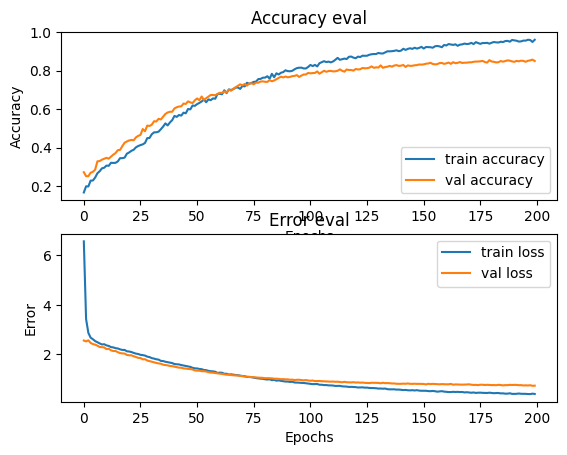

In [ ]:
fig,axs=plt.subplots(2)

axs[0].plot(history.history["accuracy"],label="train accuracy")
axs[0].plot(history.history["val_accuracy"],label="val accuracy")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy eval")

axs[1].plot(history.history["loss"],label="train loss")
axs[1].plot(history.history["val_loss"],label="val loss")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Error")
axs[1].legend(loc="upper right")
axs[1].set_title("Error eval")

In [ ]:
#Testing
model.save('music_genre_classification.h5')

In [151]:
model_new=tf.keras.models.load_model('music_genre_classification.h5')
model_new.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_112 (Dense)           (None, 512)               20992     
                                                                 
 dropout_82 (Dropout)        (None, 512)               0         
                                                                 
 dense_113 (Dense)           (None, 256)               131328    
                                                                 
 dropout_83 (Dropout)        (None, 256)               0         
                                                                 
 dense_114 (Dense)           (None, 64)                16448     
                                                                 
 dropout_84 (Dropout)        (None, 64)                0         
                                                                 
 dense_115 (Dense)           (None, 10)              

In [171]:
filename='/content/drive/MyDrive/Data/genres_original/rock/rock.00097.wav'
data,sr=librosa.load(filename)
data_features=librosa.feature.mfcc(y=data,sr=sr,n_mfcc=40)
scaled_features=np.mean(data_features.T,axis=0)
scaled_features=scaled_features.reshape(1,-1)
scaled_features.shape
prediction=np.argmax(model.predict(scaled_features))
prediction = np.array(prediction, ndmin=1)
print(labels[prediction[0]])
# prediction_label=le.inverse_transform(prediction)
# print(prediction_label[0])
ipd.Audio(filename)

1/1 [==============================] - 0s 71ms/step
rock


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)